# Correlation Relationships

It is often the case that the data we collect have many different attributes. For example, a person can have an `age` and `height` or a sensor can read `humidity` and `temperature`. So far, we've talked about two different types of "relationships" between multiple atributes (or columns) in our datasets: causation and functional dependency. 

* Causation. X causes Y, if intervening (or actively changing X) affects the distribution of Y, e.g.,"Smoking causes cancer" if I start smoking it means that I change my likelihood of getting cancer.
* Functional Dependency. X -> Y, knowing X is equivalent to knowing Y. "Everyone who smokes has cancer". Knowing someone smokes is equivalent to knowing their cancer status.

Causation and Functional Dependence are strong notions of relationship. Now, we'll explore a weaker notion called correlation:

* Correlation. X and Y are correlated if X varies similarly to Y, e.g., "Those who smoke have a higher probability of having cancer".

## Covariance
Covariance is a measure of the joint variability of two random variables. If the greater values of one variable mainly correspond with the greater values of the other variable, and the same holds for the lesser values, (i.e., the variables tend to show similar behavior), the covariance is positive. In the opposite case, when the greater values of one variable mainly correspond to the lesser values of the other, (i.e., the variables tend to show opposite behavior), the covariance is negative. The sign of the covariance therefore shows the tendency in the linear relationship between the variables.
$$Cov(X,Y) = \mathbf{E}[(X-E[X])(Y - E[Y])] = E[XY] - E[X]E[Y]$$

If two variables are independent, their covariance is 0, but the opposite is not true! 

Empirically measuring covariance requires associated samples ${(x_i,y_i)}_{i=1}^n$. You can calculate the sample covariance by:
$$\mu_{xy} = \frac{1}{N} \sum_{i=1}^N x_i y_i ~~  \mu_{x} = \frac{1}{N} \sum_{i=1}^N x_i ~~ \mu_{y} = \frac{1}{N} \sum_{i=1}^N y_i$$
$$cov(x,y) = \mu_{xy} - \mu_{x}\mu_{y}$$

## Correlation
The basic measure of correlation is a normalized version of covariance:
$$ Corr(X,Y) = \frac{Cov(X,Y)}{\sqrt{Var(X)Var(Y)}}$$
This creates a metric between -1 and 1 that measures the strength of linear dependence between two random variables. 
Like Covariance, empirically measuring correlation requires associated samples ${(x_i,y_i)}_{i=1}^n$. You can calculate the sample correlation by first calculating the covariance as before:
$$cov(x,y) = \mu_{xy} - \mu_{x}\mu_{y}$$
and then calculating the variances of both x and y:
$$\mu_{xx} = \frac{1}{N} \sum_{i=1}^N x_i x_i ~~  \mu_{yy} = \frac{1}{N} \sum_{i=1}^N y_i y_i$$
$$var(x) = \mu_{xx} - \mu_{x}^2 ~~ var(y) = \mu_{yy} - \mu_{y}^2$$
$$corr(x,y) = \frac{cov(x,y)}{\sqrt{var(x) \cdot var(y)}}$$

This basic definition of correlation is called the Pearson Correlation Coefficient. Let's look at some examples of how it works. We use the `scipy.stats` package to calculate this value:

1. Let's generate 100 random numbers between 0 and 1 and call this value x. Now let's define a variable y that is exactly equal to x. Not surprisingly the correlation is equal to 1.

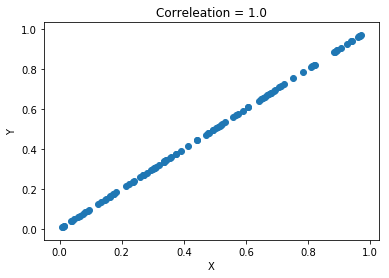

In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

x = np.random.rand(100)
y = x

corr = scipy.stats.pearsonr(x,y)[0]

plt.scatter(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Correleation = '+ str(corr))
plt.show()

2. Let's tweak y slightly and make it negative instead, now the correlation becomes -1:

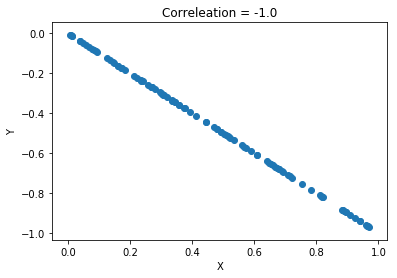

In [19]:
y = -x

corr = scipy.stats.pearsonr(x,y)[0]

plt.scatter(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Correleation = '+ str(corr))
plt.show()

3. The good part about correlations is that they are robust to linear scaling of the random variables. Suppose, we scaled all y's up by 10x.

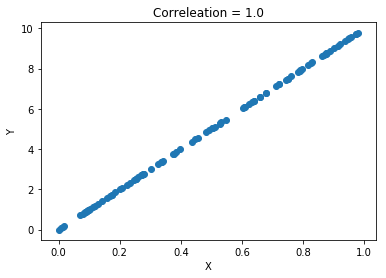

In [20]:
x = np.random.rand(100)
y = 10*x

corr = scipy.stats.pearsonr(x,y)[0]

plt.scatter(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Correleation = '+ str(corr))
plt.show()

4. Correlations become more interesting where there is noise and the relationship isn't perfect. How close the number is to -1 or 1 shows the strength of the relationship.

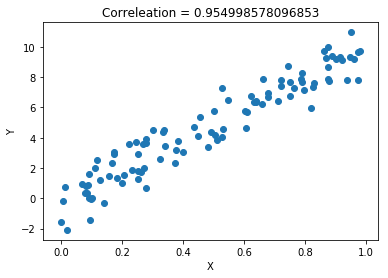

In [22]:
y = 10*x + np.random.randn(100)

corr = scipy.stats.pearsonr(x,y)[0]

plt.scatter(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Correleation = '+ str(corr))
plt.show()

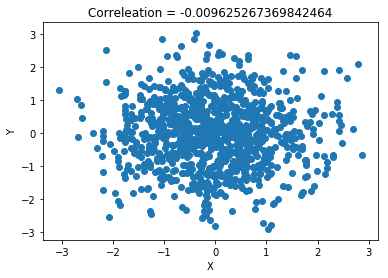

In [15]:
x = np.random.randn(1000)
y = np.random.randn(1000)
corr = scipy.stats.pearsonr(x,y)[0]

plt.scatter(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Correleation = '+ str(corr))
plt.show()

The problem is that linearity only goes so far. Suppose, we took the example above and polluted only two of the data points:

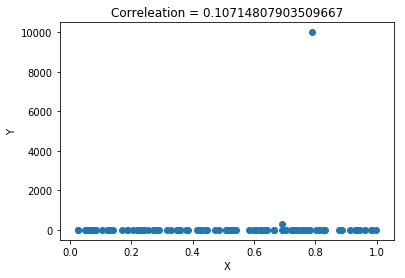

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

x = np.random.rand(100)
y = 10*x + np.random.randn(100)
y[0] = 300
y[1] = 10000
corr = scipy.stats.pearsonr(x,y)[0]

plt.scatter(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Correleation = '+ str(corr))
plt.show()

## Robust Correlation
A Spearman correlation coefficient is also referred to as Spearman rank correlation or Spearman’s rho. Spearman’s rho measures the strength of association between two variables but is more robust to outliers than Pearson correlation. To calculate it, we first rank transform our dataset. We rank all of our x observations from 1,...,N and we rank all of our y observations from 1,...N, and assign each data point the corresponding rank. Then, over the rank transformed data, we calculate the Pearson correlation coefficient.

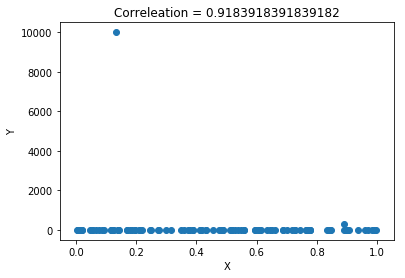

In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

x = np.random.rand(100)
y = 10*x + np.random.randn(100)
y[0] = 300
y[1] = 10000
corr = scipy.stats.spearmanr(x,y)[0]

plt.scatter(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Correleation = '+ str(corr))
plt.show()